In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

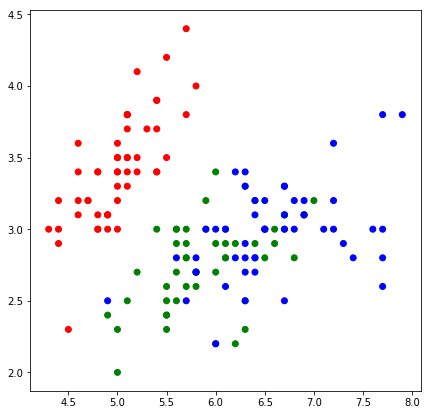

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

### Задание №1. Добавляем веса в зависимости от номера соседа

In [20]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        # Добавляем веса в зависимости от номера соседа
        n = 1
        for d in sorted(test_distances)[0:k]:
            w = (1 + 1/n)
            classes[d[1]] += w
            n += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [21]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

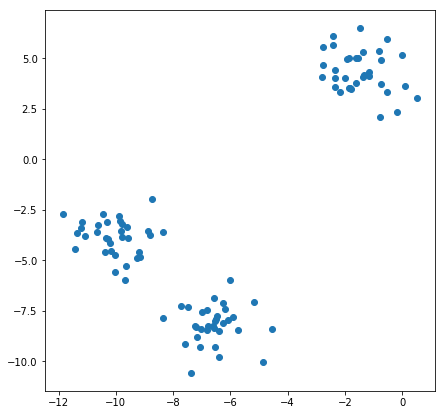

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

### Задание №2

In [200]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    #счетчик итераций
    n = 1
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к классу, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
        
        # Определим среднее квадратичное внутриклассовое расстояние
        square_distance = 0
        counter = 0
        for i in range(len(centroids)):
            for x in classes[i]:
                square_distance += (np.square(centroids[i][0] - x[0]) + np.square(centroids[i][1] - x[1]))
                counter += 1
        mean_square_distance = square_distance / counter
#        print(f'среднее квадратичное внутриклассовое расстояние после {n} итераций: {mean_square_distance}')
        
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
        
        n += 1
              
    return old_centroids, classes, mean_square_distance

[2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005, 2472.296906149005]


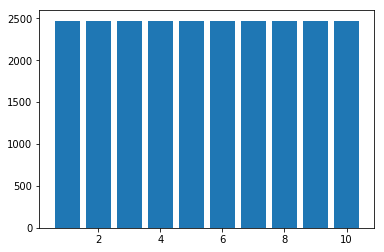

In [199]:
max_iterations = 5
min_distance = 1e-4
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
msd_list = []

for i in k_list:
    centroids, clusters, mean_square_distance = kmeans(X, k, max_iterations, min_distance)
    msd_list.append(mean_square_distance*1000)
print(msd_list)
plt.bar(k_list, msd_list); 

In [180]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [181]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

среднее квадратичное внутриклассовое расстояние после 1 итераций: 4.58499292970913


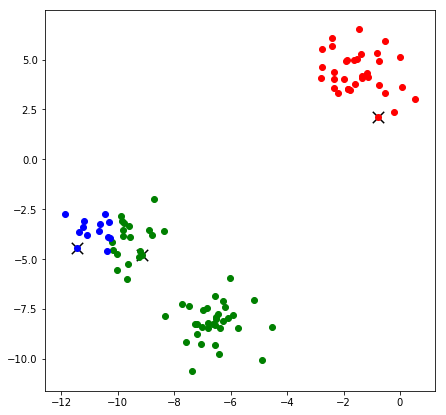

In [182]:
centroids, clusters, mean_square_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

среднее квадратичное внутриклассовое расстояние после 1 итераций: 4.58499292970913
среднее квадратичное внутриклассовое расстояние после 2 итераций: 3.489074372453477
среднее квадратичное внутриклассовое расстояние после 3 итераций: 2.9674475952240447


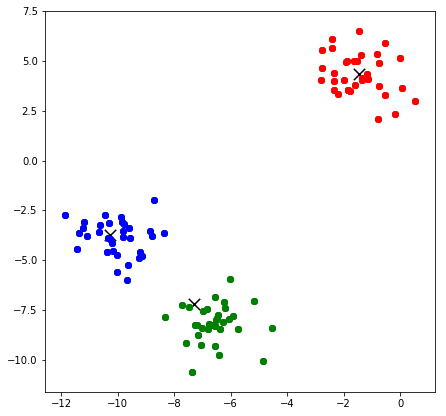

In [183]:
max_iterations = 3

centroids, clusters, mean_square_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

среднее квадратичное внутриклассовое расстояние после 1 итераций: 4.58499292970913
среднее квадратичное внутриклассовое расстояние после 2 итераций: 3.489074372453477
среднее квадратичное внутриклассовое расстояние после 3 итераций: 2.9674475952240447
среднее квадратичное внутриклассовое расстояние после 4 итераций: 2.667063193390076
среднее квадратичное внутриклассовое расстояние после 5 итераций: 2.4722969061490048


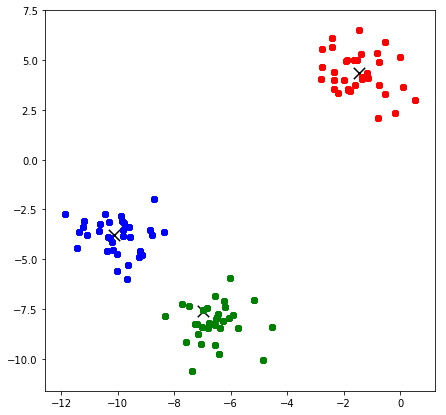

In [184]:
max_iterations = 5

centroids, clusters, mean_square_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

среднее квадратичное внутриклассовое расстояние после 1 итераций: 4.58499292970913
среднее квадратичное внутриклассовое расстояние после 2 итераций: 3.489074372453477
среднее квадратичное внутриклассовое расстояние после 3 итераций: 2.9674475952240447
среднее квадратичное внутриклассовое расстояние после 4 итераций: 2.667063193390076
среднее квадратичное внутриклассовое расстояние после 5 итераций: 2.4722969061490048
среднее квадратичное внутриклассовое расстояние после 6 итераций: 2.335864299825891
среднее квадратичное внутриклассовое расстояние после 7 итераций: 2.2349972935168543
среднее квадратичное внутриклассовое расстояние после 8 итераций: 2.157401589640871
среднее квадратичное внутриклассовое расстояние после 9 итераций: 2.0958604366870532
среднее квадратичное внутриклассовое расстояние после 10 итераций: 2.045860204525437


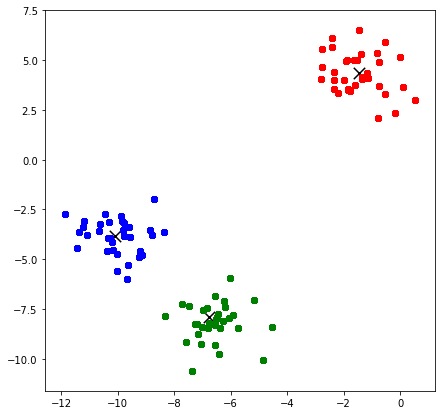

In [185]:
max_iterations = 10

centroids, clusters, mean_square_distance = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)